# 回帰

In [19]:
# モジュールのインポート
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg

In [1]:
# 人工的なデータの準備
x = [1, 2, 4, 6, 7]
y = [1, 3, 3, 5, 3]

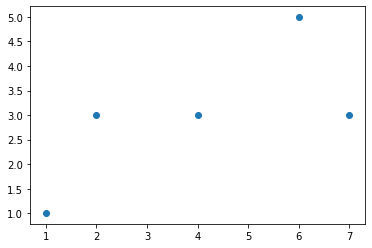

In [4]:
# 散布図で見てみる
plt.scatter(x, y)
plt.show()

### 原点を通る直線による近似

$$
a = \frac{x^Ty}{\|x\|^2}
$$

In [5]:
def reg1dim(x, y):
    a = np.dot(x, y)/ (x**2).sum()
    return a

In [7]:
x = np.array(x)
y = np.array(y)

In [9]:
a = reg1dim(x, y)

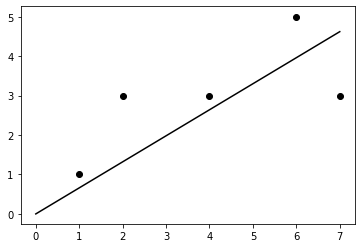

In [10]:
plt.scatter(x, y, color='k')
xmax = x.max()
plt.plot([0, xmax], [0, a*xmax], color='k')
plt.show()

### 一般の直線による近似

In [13]:
def reg1dim2(x, y):
    n = len(x)
    a = ((np.dot(x, y) - y.sum() * x.sum() /n ) /
         ((x**2).sum() - x.sum()**2 / n))
    b = (y.sum() - a * x.sum()) / n
    return a, b

In [14]:
a, b = reg1dim2(x, y)

In [16]:
print(f'aの値：{a}')
print(f'bの値：{b}')

aの値：0.38461538461538464
bの値：1.4615384615384615


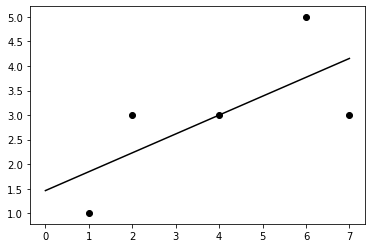

In [18]:
plt.scatter(x, y, color='k')
xmax = x.max()
# ↓この書き方で2点をつないだ直線をかける
plt.plot([0, xmax], [b, a * xmax + b], color='k')
plt.show()

### 特徴量ベクトルが多次元の場合

In [26]:
n = 100
scale = 10
X = np.random.random((n, 2)) * scale 

In [27]:
np.c_[np.ones(X.shape[0]), X]

array([[1.        , 4.34027291, 2.96385812],
       [1.        , 1.72705418, 5.77591322],
       [1.        , 8.1315828 , 9.39562589],
       [1.        , 7.66932349, 9.76439011],
       [1.        , 8.70800581, 6.99874292],
       [1.        , 3.24657845, 7.21921707],
       [1.        , 7.46370188, 5.56856661],
       [1.        , 9.23757325, 9.44936923],
       [1.        , 8.48270646, 1.15978363],
       [1.        , 1.12252615, 0.4029426 ],
       [1.        , 0.38831144, 7.4345521 ],
       [1.        , 8.41737344, 9.59654989],
       [1.        , 9.02421704, 4.56598009],
       [1.        , 5.32961836, 8.04395574],
       [1.        , 5.95294567, 2.54736428],
       [1.        , 4.07486192, 0.11018377],
       [1.        , 6.10644973, 0.6430954 ],
       [1.        , 1.14390824, 3.34670884],
       [1.        , 8.43084014, 4.5890455 ],
       [1.        , 3.12614142, 8.48165605],
       [1.        , 3.59762948, 8.66628   ],
       [1.        , 3.99586137, 1.64849864],
       [1.

In [33]:
class LinearRegression:
    def __init__(self):
        self.w_ = None
        
    def fit(self, X, t):
        Xtil = np.c_[np.ones(X.shape[0]), X]
        A = np.dot(Xtil.T, Xtil)
        b = np.dot(Xtil.T, t)
        self.w_ = np.linalg.solve(A, b)
        
    def predict(self, X):
        if X.ndim == 1:
            X = X.reshape(1, -1)
        Xtil = np.c_[np.ones(X.shape[0]), X]
        return np.dot(Xtil, self.w_)

In [34]:
n = 100
scale = 10

np.random.seed(0)
X = np.random.random((n, 2)) * scale
w0 = 1
w1 = 2
w2 = 3
y = w0 + w1 * X[:, 0] + w2 * X[:, 1] + np.random.randn(n)

In [35]:
model = LinearRegression()
model.fit(X, y)
print('係数：', model.w_)
print("(1, 1)に対する予測値：", model.predict(np.array([1, 1])))

係数： [1.11450326 1.95737004 3.00295751]
(1, 1)に対する予測値： [6.07483081]
